In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Rahmat\anaconda3\envs\jcop\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
pd.options.display.max_columns =50

In [4]:
df = pd.read_csv("data/breast_cancer.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


terlihat dari dari kebanyakan banyak feature yang makna nya bisa dibilang hampir sama, contoh nya saja radius dengan area. 
- maka dari itu kita bisa gunakan PCA guna reduce dimention agar feature yang dilakukan training bisa dicompres namun informasi tetap dipertahankan walaupun ada sedikit informasi yang hilang

In [7]:
df.target.value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [8]:
from jcopml.plot import plot_missing_value

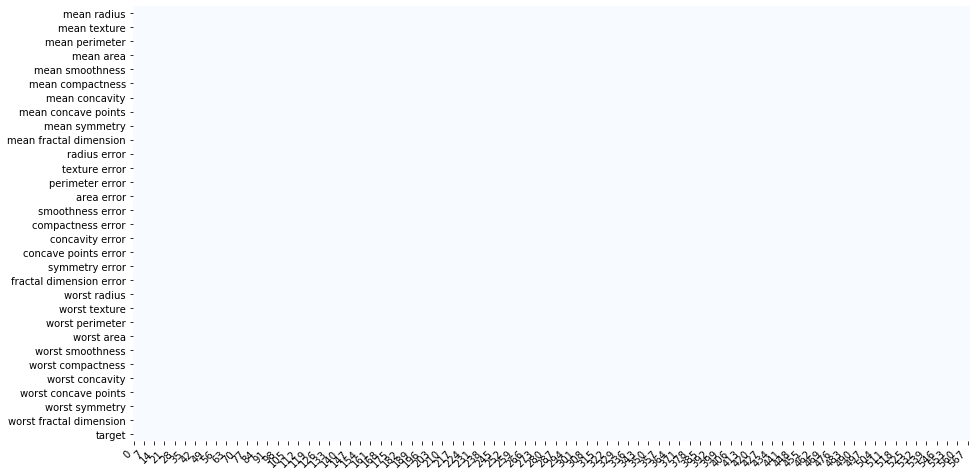

In [9]:
plot_missing_value(df)

In [10]:
from sklearn.model_selection import train_test_split

In [29]:
X= df.drop(columns="target")
y= df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify= y , random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [30]:
from sklearn.decomposition import PCA
import seaborn as sns

In [31]:
pca = PCA(n_components=2, whiten=True) # whiten penamaan untuk scaling


In [32]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test) # data test hanya transform untuk menghindari data leakage dan data test hanya memanfaatkan komponen dari data train

In [33]:
X_train_pca.shape # terlihat bahwa feature setelah dilakukan dimentionality reduction menjadi 2 feature

(455, 2)

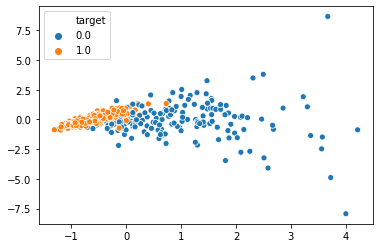

In [34]:
sns.scatterplot(X_train_pca[:,0],X_train_pca[:,1], hue = y_train)

terlihat bahwa data terpisah walaupun dilihat menggunakan dimensi yang telah di reduce menjadi 2

# Training
- kita bisa tunning jumlah n_cluster atau mau seberapa kita reduce feature nya, tinggal masukin aja ke pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.svm import SVC

In [36]:
from jcopml.pipeline import num_pipe,cat_pipe

In [37]:
from jcopml.tuning import random_search_params as rsp

In [38]:
rsp.svm_params

{'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
 'algo__C': Real(low=-3, high=3, prior='log-uniform')}

In [39]:
from jcopml.tuning.space import Integer,Real

In [43]:
pipeline.get_params() # cara melihat parameter yang bisa di tuning

{'memory': None,
 'steps': [('prep',
   ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('numerik',
                                    Pipeline(memory=None,
                                             steps=[('imputer',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_value=None,
                                                                   missing_values=nan,
                                                                   strategy='median',
                                                                   verbose=0))],
                                             verbose=False),
                                    Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
   

In [41]:
preprocessor = ColumnTransformer([
    ("numerik",num_pipe(), X_train.columns)
])
pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca',PCA()),
    ('algo', SVC())
])

parameter ={
    'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
    'algo__C': Real(low=-3, high=3, prior='log-uniform'),
    'pca__n_components': Integer(2,30),
    'pca__whiten': [True,False],
    'prep__numerik__imputer__strategy': ['mean', 'median']
}

model = RandomizedSearchCV(pipeline, parameter,cv=3,n_jobs=-1,n_iter=50, verbose=1,random_state=42)
model.fit(X_train,y_train)

print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__C': 3.907967156822884, 'algo__gamma': 0.008632008168602547, 'pca__n_components': 20, 'pca__whiten': True}
0.9714285714285714 0.9560532125014524 0.9736842105263158


[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.9s finished


# Teknik menentukan jumlah principal component nya (n_components) ~> Cumulative Explained Variance


In [45]:
pca = PCA()
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'cumulative explained variance')

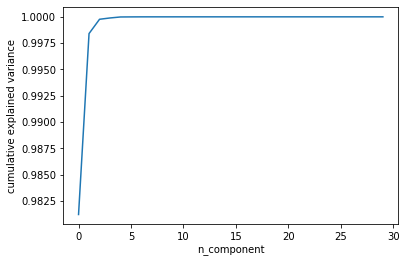

In [46]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("n_component")
plt.ylabel("cumulative explained variance")

cara membaca grafik nya= terlihat pada saat n_component nya 30 maka cumulative explained variance nya masih 100 persen, maksud nya informasi masih dipertahankan karena semua feature masih digunakan, tapi jika kita lihat pada n_component di rentang 3-29 juga nilai cumulative explaine variance nya juga masih tinggi, ini menandakan jika kita gunakan atau kita reduce dimention di sekitaran itu maka informasi nya juga masih dipertahan kan dan hanya sedikit informasi yang hilang.
- dari hal ini kita bisa reduce feature tapi masih mempertahankan informasi yang ada. dan kita bisa hemat komputasi karna feature sudah di reduce (bukan di buang loh ya, tapi informasi nya dilihat dari sisi lain nya atau menjadi kan nya feature yang lebih bermakna walaupun feature nya sudah di reduce)

In [47]:
preprocessor = ColumnTransformer([
    ("numerik",num_pipe(), X_train.columns)
])
pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca',PCA(n_components=5,whiten=True)),
    ('algo', SVC())
])

parameter ={
    'algo__gamma': Real(low=-3, high=3, prior='log-uniform'),
    'algo__C': Real(low=-3, high=3, prior='log-uniform'),
    'prep__numerik__imputer__strategy': ['mean', 'median']
}

model = RandomizedSearchCV(pipeline, parameter,cv=3,n_jobs=-1,n_iter=50, verbose=1,random_state=42)
model.fit(X_train,y_train)

print(model.best_params_)
print(model.score(X_train,y_train), model.best_score_, model.score(X_test,y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.9s


{'algo__C': 51.41096648805754, 'algo__gamma': 0.015777663630582466, 'prep__numerik__imputer__strategy': 'mean'}
0.9692307692307692 0.9626612059951202 0.9649122807017544


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.4s finished


ya setelah kita gunakan teknik untuk mengetahui sampai berapa komponen kita bisa reduce tapi tetap mempertahankan informasi walaupun ada sedikit informasi yang hilang. 